## Homework 02/05/2023

1) Download a copy of the Anscombe's quartet data. Fit a Gaussian Regression model (both first and second order polynomials) to the data and plot the results. 

In [78]:
#Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C


In [79]:
np.random.seed(1)

#import data
df = pd.read_csv('/Anscombe_quartet_data.csv', sep = ',')
#df.head

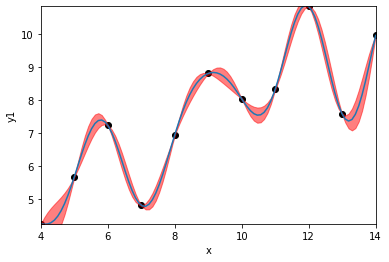

In [80]:
# Load Anscombe's quartet data
x = np.array(df["x123"])
y1 = np.array(df["y1"])

# Fit a Gaussian Regression model with a first-order polynomial
kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)
gp.fit(x[:, np.newaxis], y1)

# Plot the results
x_pred = np.linspace(x.min(), x.max(), 100)
y_pred, y_std = gp.predict(x_pred[:, np.newaxis], return_std=True)
plt.scatter(x, y1, c='k')
plt.plot(x_pred, y_pred)
plt.fill_between(x_pred, y_pred - y_std, y_pred + y_std, alpha=0.5, color='red')
plt.xlim(x_pred.min(), x_pred.max())
plt.ylim(y1.min(), y1.max())
plt.xlabel("x")
plt.ylabel("y1")
plt.show()


/usr/local/lib/python3.8/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/gaussian_process/kernels.py:420: Convergence

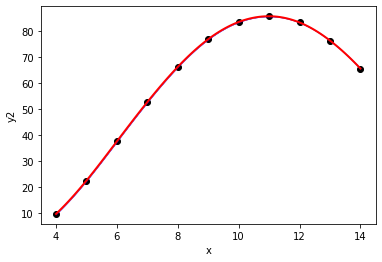

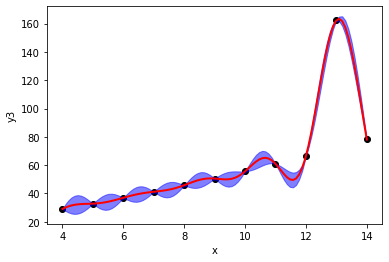

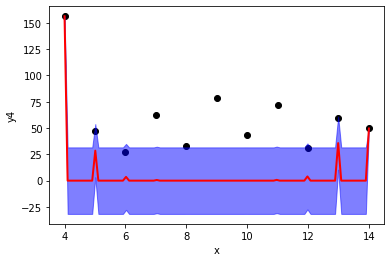

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

# Load the Anscombe's quartet data set
df = pd.read_csv("/Anscombe_quartet_data.csv")

# Select one dataset from the quartet
x = np.array(df["x123"])

# Split the data into feature and target variables
X = df["x123"].values.reshape(-1, 1)
y2 = df["y2"]**2
y3 = df["y3"]**2
y4 = df["y4"]**2

# Define the kernel for the Gaussian Process model
kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
gpr2 = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)
gpr2.fit(X, y2)
gpr3 = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)
gpr3.fit(X, y3)
gpr4 = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)
gpr4.fit(X, y4)

# Plot the results for y2
X_ = np.linspace(X.min(), X.max(), 100)
y_mean, y_std = gpr2.predict(X_[:, np.newaxis], return_std=True)
plt.scatter(X, y2, c='k')
plt.plot(X_, y_mean, 'r', lw=2, zorder=9)
plt.fill_between(X_, y_mean - y_std, y_mean + y_std, alpha=0.5, color='blue')
plt.xlabel("x")
plt.ylabel("y2")
plt.show()

# Plot the results for y3
X_ = np.linspace(X.min(), X.max(), 100)
y_mean, y_std = gpr3.predict(X_[:, np.newaxis], return_std=True)
plt.scatter(X, y3, c='k')
plt.plot(X_, y_mean, 'r', lw=2, zorder=9)
plt.fill_between(X_, y_mean - y_std, y_mean + y_std, alpha=0.5, color='blue')
plt.xlabel("x")
plt.ylabel("y3")
plt.show()

# Plot the results for y3
X_ = np.linspace(X.min(), X.max(), 100)
y_mean, y_std = gpr4.predict(X_[:, np.newaxis], return_std=True)
plt.scatter(X, y4, c='k')
plt.plot(X_, y_mean, 'r', lw=2, zorder=9)
plt.fill_between(X_, y_mean - y_std, y_mean + y_std, alpha=0.5, color='blue')
plt.xlabel("x")
plt.ylabel("y4")
plt.show()


2) Download a Logistic regression dataset. Fit a logistic regression model and plot the results. 

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9511111111111111


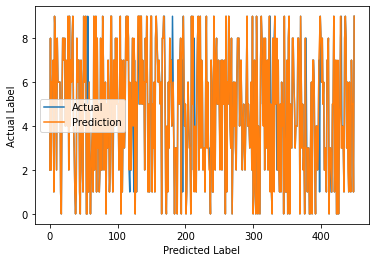

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Load the iris dataset
digits = load_digits()

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=0)

# Fit a logistic regression model
logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)
logisticRegr.predict(x_test[0].reshape(1,-1))
predictions = logisticRegr.predict(x_test)
score = logisticRegr.score(x_test, y_test)
print(score)

# Plot the results
plt.plot(predictions)
plt.plot(y_test)
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.legend(["Actual", "Prediction"])
plt.show()